In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
from scipy.stats import ttest_ind
from numba import njit, jit
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
meta = pd.read_csv('../data/META_SL.csv')

In [3]:
meta['plat'].unique()

array(['Agilent', 'Illumina_NGS', 'Affymetrix_U133', 'Illumina_Chip',
       'Affymetrix_HUG', 'Affymetrix_PRV'], dtype=object)

In [4]:
meta

,CN,type,plat,TP
0,C_1,Solid tumor,Agilent,Solid tumor_Agilent
1,C_2,Solid tumor,Agilent,Solid tumor_Agilent
2,C_3,Solid tumor,Agilent,Solid tumor_Agilent
3,C_4,Solid tumor,Agilent,Solid tumor_Agilent
4,C_5,Solid tumor,Agilent,Solid tumor_Agilent
...,...,...,...,...
7162,C_7163,C,Affymetrix_PRV,C_Affymetrix_PRV
7163,C_7164,D,Affymetrix_PRV,D_Affymetrix_PRV
7164,C_7165,D,Affymetrix_PRV,D_Affymetrix_PRV
7165,C_7166,D,Affymetrix_PRV,D_Affymetrix_PRV


#### Данные, на которых нужно проверить гипотезу

In [5]:
data = pd.read_csv('D:/data/11.csv')

In [6]:
data.head()

,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
AANAT,5.326725,4.549250,4.414009,4.286283,4.717123,3.915616,3.808433,5.579895,4.388223,7.284386,...,4.732509,4.511369,3.218837,3.381191,3.053499,3.148166,3.587505,3.456695,3.700065,3.364034
AASDHPPT,75.424738,81.286002,78.639646,74.271559,69.776623,82.250093,79.326477,85.733226,76.583996,68.412965,...,100.166933,103.307666,96.278140,95.849637,92.426787,90.227250,107.579454,105.771686,106.087814,108.132644
AASS,224.703720,233.470931,253.326959,267.483211,257.503684,283.727994,335.986833,226.216499,256.057525,158.254369,...,79.066110,70.146068,266.329770,259.744349,261.819798,268.529976,235.093164,232.655762,236.738101,229.250014
AATK,16.306986,14.919777,13.557144,16.364886,14.424481,13.033276,14.376482,14.432064,14.824869,14.306553,...,341.021920,310.650763,40.813813,41.908042,40.141167,42.680254,100.720632,92.318567,97.430197,102.224446
ABAT,22.382094,23.858756,22.929523,25.302038,19.110169,22.295410,23.838419,27.740015,24.696391,14.510588,...,437.833585,497.211499,28.471300,28.695431,30.934971,31.816069,67.948497,76.896133,69.589969,71.246987


In [7]:
data.columns = meta['CN']

In [8]:
data.head()

CN,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
AANAT,5.326725,4.549250,4.414009,4.286283,4.717123,3.915616,3.808433,5.579895,4.388223,7.284386,...,4.732509,4.511369,3.218837,3.381191,3.053499,3.148166,3.587505,3.456695,3.700065,3.364034
AASDHPPT,75.424738,81.286002,78.639646,74.271559,69.776623,82.250093,79.326477,85.733226,76.583996,68.412965,...,100.166933,103.307666,96.278140,95.849637,92.426787,90.227250,107.579454,105.771686,106.087814,108.132644
AASS,224.703720,233.470931,253.326959,267.483211,257.503684,283.727994,335.986833,226.216499,256.057525,158.254369,...,79.066110,70.146068,266.329770,259.744349,261.819798,268.529976,235.093164,232.655762,236.738101,229.250014
AATK,16.306986,14.919777,13.557144,16.364886,14.424481,13.033276,14.376482,14.432064,14.824869,14.306553,...,341.021920,310.650763,40.813813,41.908042,40.141167,42.680254,100.720632,92.318567,97.430197,102.224446
ABAT,22.382094,23.858756,22.929523,25.302038,19.110169,22.295410,23.838419,27.740015,24.696391,14.510588,...,437.833585,497.211499,28.471300,28.695431,30.934971,31.816069,67.948497,76.896133,69.589969,71.246987


In [9]:
data = data.astype(float)

In [10]:
data.head()

CN,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
AANAT,5.326725,4.549250,4.414009,4.286283,4.717123,3.915616,3.808433,5.579895,4.388223,7.284386,...,4.732509,4.511369,3.218837,3.381191,3.053499,3.148166,3.587505,3.456695,3.700065,3.364034
AASDHPPT,75.424738,81.286002,78.639646,74.271559,69.776623,82.250093,79.326477,85.733226,76.583996,68.412965,...,100.166933,103.307666,96.278140,95.849637,92.426787,90.227250,107.579454,105.771686,106.087814,108.132644
AASS,224.703720,233.470931,253.326959,267.483211,257.503684,283.727994,335.986833,226.216499,256.057525,158.254369,...,79.066110,70.146068,266.329770,259.744349,261.819798,268.529976,235.093164,232.655762,236.738101,229.250014
AATK,16.306986,14.919777,13.557144,16.364886,14.424481,13.033276,14.376482,14.432064,14.824869,14.306553,...,341.021920,310.650763,40.813813,41.908042,40.141167,42.680254,100.720632,92.318567,97.430197,102.224446
ABAT,22.382094,23.858756,22.929523,25.302038,19.110169,22.295410,23.838419,27.740015,24.696391,14.510588,...,437.833585,497.211499,28.471300,28.695431,30.934971,31.816069,67.948497,76.896133,69.589969,71.246987


#### Код Стьюдента

In [11]:
rng = np.random.default_rng()

In [12]:
def get_splitted_columns(columns):
    shuffled = rng.permutation(columns)
    columns_1 = shuffled[:len(columns) // 2]
    columns_2 = shuffled[len(columns) // 2:]
    return columns_1, columns_2

In [13]:
def split_for_f(gene, columns_1, columns_2):
    sample_1 = gene[columns_1].values
    sample_2 = gene[columns_2].values
    return f(sample_1, sample_2)

$$
f_g = sign(\overline{D}_g - \overline{H}_g) \cdot (-lg(P_g))
$$

In [14]:
# @njit
def f(sample_1, sample_2):
    sign = np.sign(sample_1.mean() - sample_2.mean())
    p_value = ttest_ind(sample_1, sample_2)[1]
    return sign * (-np.log1p(p_value))

In [15]:
def calc_corr(data, fixed_cols, splitting_cols):
    cols_1, cols_2 = get_splitted_columns(splitting_cols)
    
    f_1 = data.apply(split_for_f, args=(fixed_cols, cols_1), axis=1)
    f_2 = data.apply(split_for_f, args=(fixed_cols, cols_2), axis=1)
    
    return f_1.corr(f_2)

In [16]:
# %time calc_corr(data, plat_1, plat_2)

#### Перебор всех пар платформ

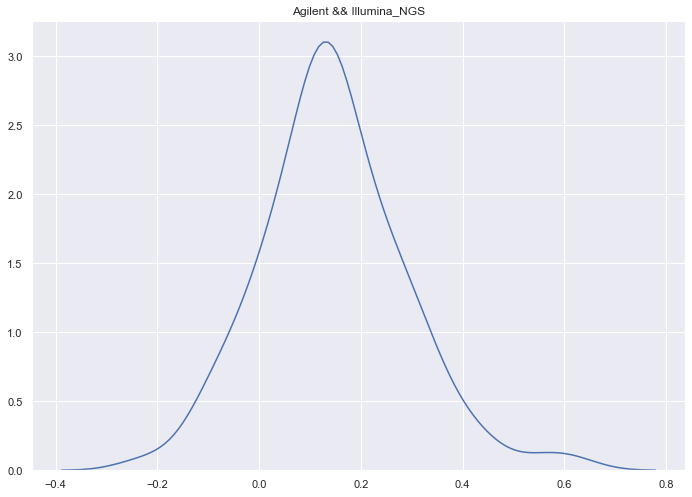

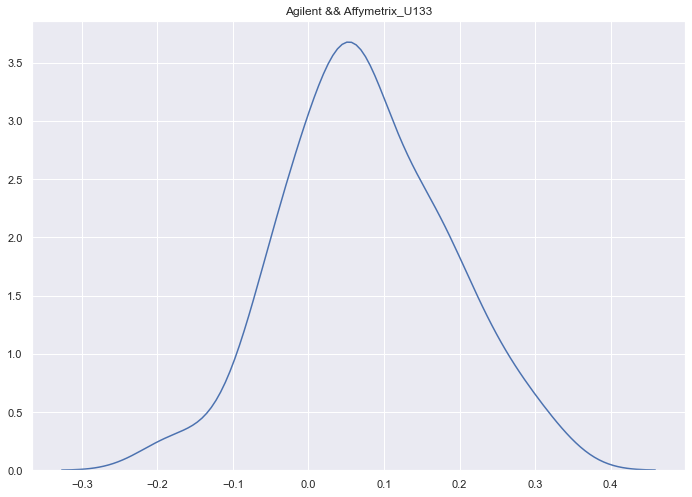

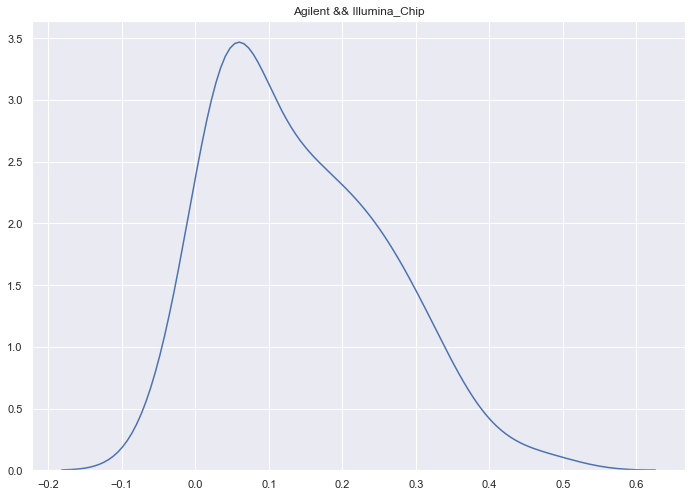

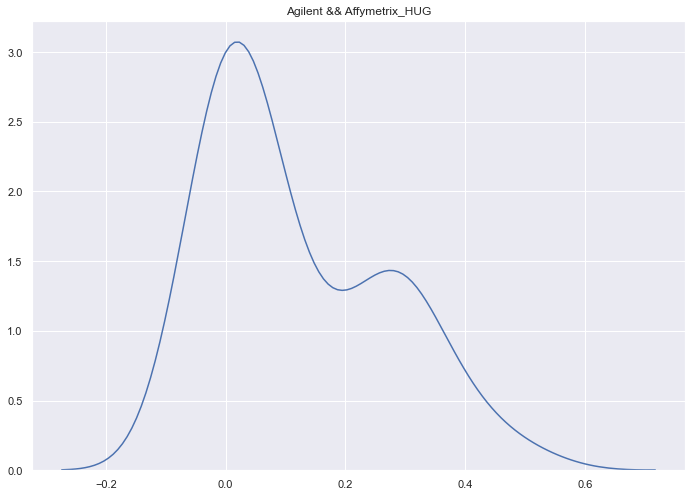

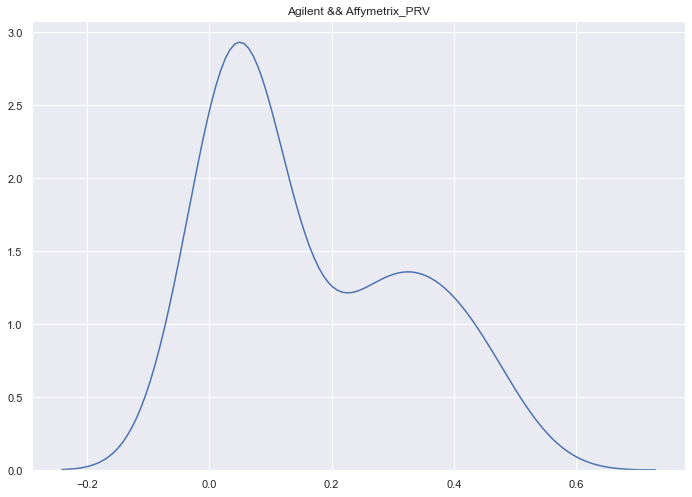

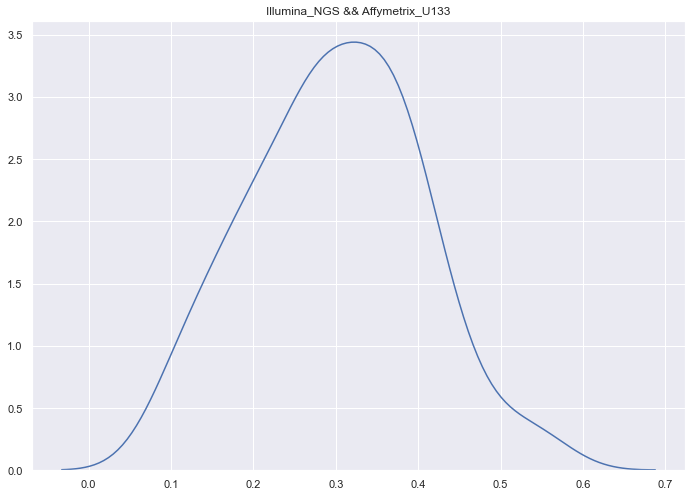

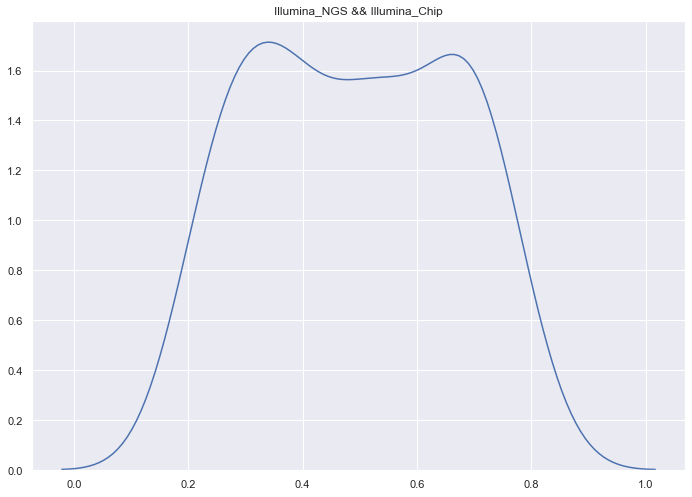

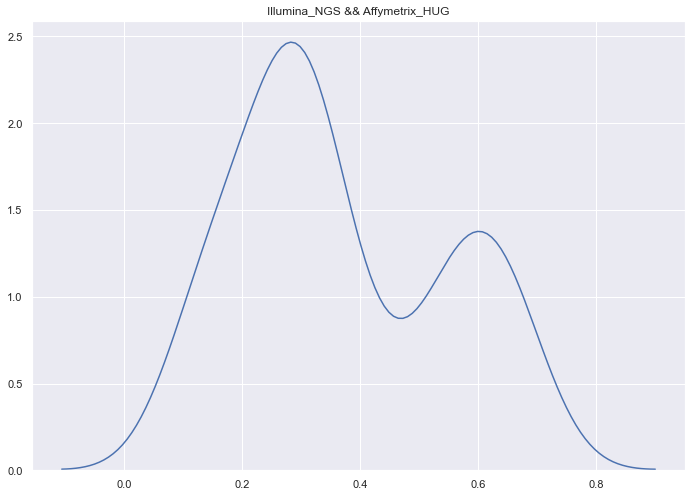

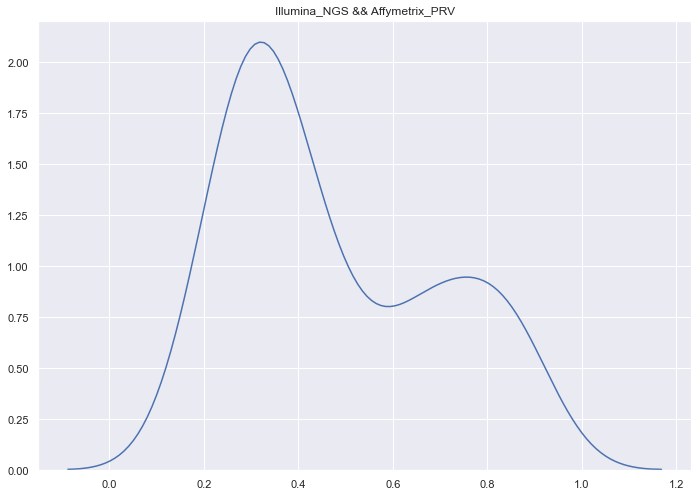

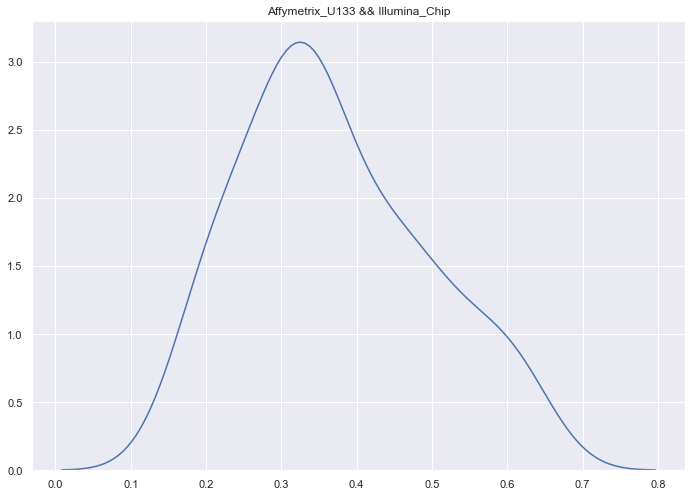

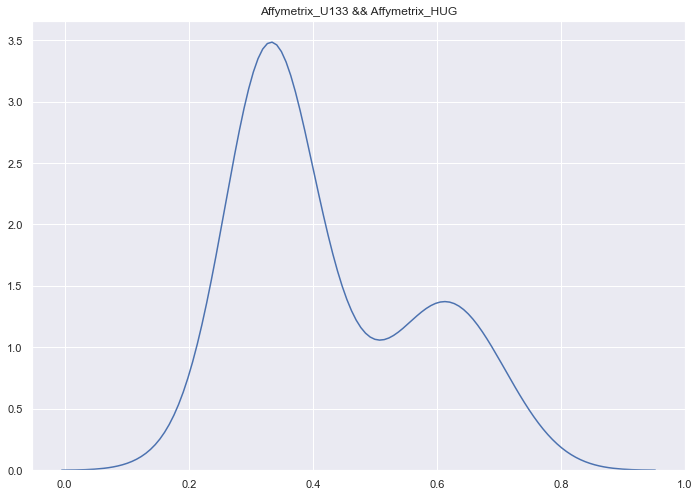

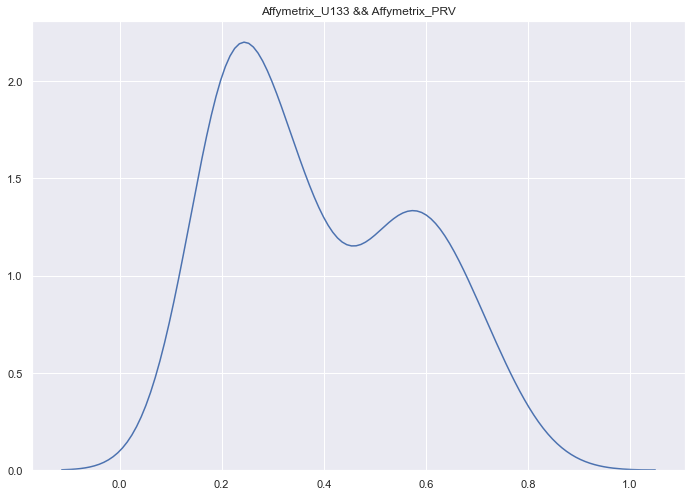

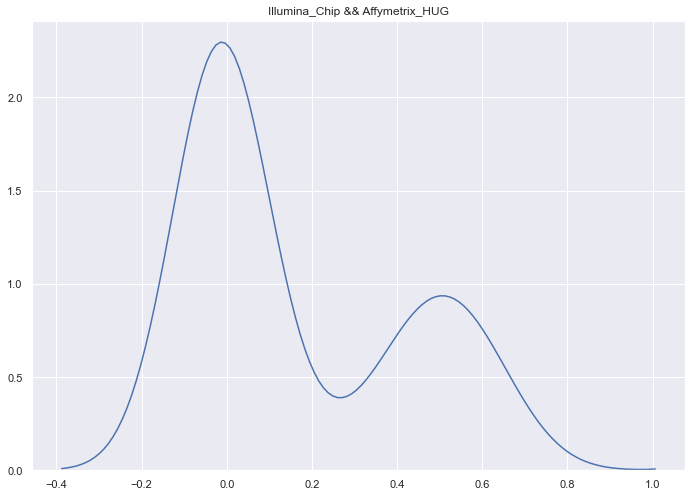

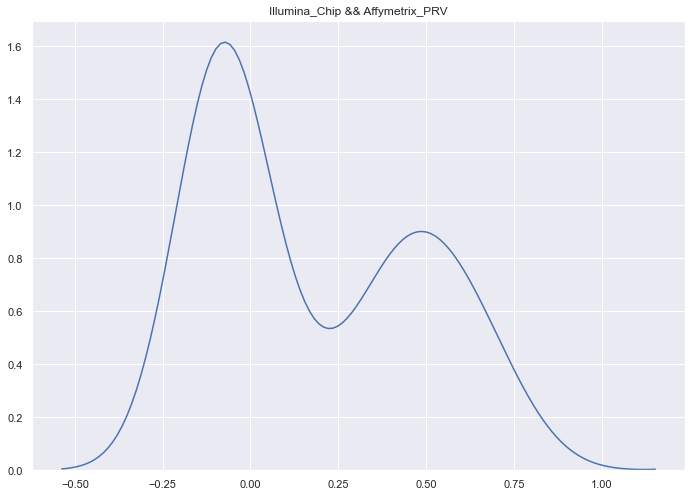

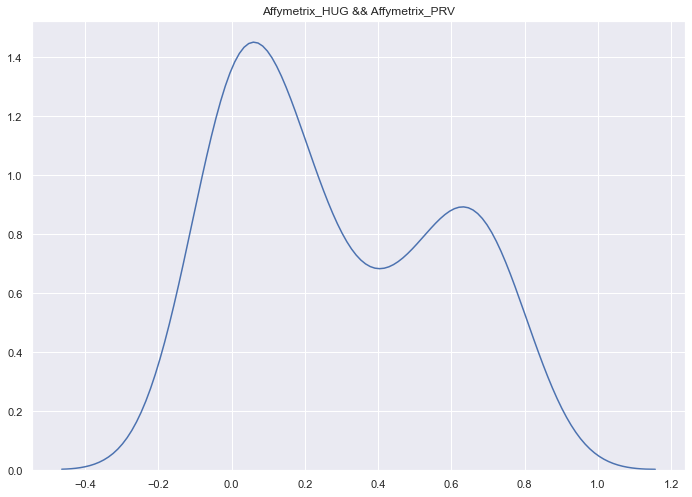

In [17]:
for idx_1, title_1 in enumerate(meta['plat'].unique()):
    for idx_2, title_2 in enumerate(meta['plat'].unique()):
        
        if(idx_2 > idx_1):
            
            plat_1 = meta[meta['plat'] == title_1]['CN']
            plat_2 = meta[meta['plat'] ==  title_2]['CN']
            
            corrs = [calc_corr(data, plat_1, plat_2) for i in range(100)]
            
            plt.figure()
            plt.title(title_1 + " && " + title_2)
            sns.distplot(corrs, hist=False)